# Feature Subset Selection
[Four different selection methods](https://machinelearningmastery.com/feature-selection-machine-learning-python/)


### Univariate Selection
Selection based on strongest statistical relationship with the output variable 

In [73]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# load data
url = "data/training_data.xlsx"
dataframe = pd.read_excel(url)
dataframe = dataframe.drop("Subject", axis=1)
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]

# feature extraction
test = SelectKBest(score_func=chi2, k=10)
fit = test.fit(X, y)

# summarize scores
np.set_printoptions(suppress=True)
print(fit.scores_)
X = fit.transform(X)

pd.DataFrame([dataframe.columns, fit.scores_]).transpose().sort_values(by=1, ascending=False).transpose()

[  44.582   18.154 6939.224    0.034    0.235    0.096    0.077    0.023
    0.034    0.091    0.135    0.517    0.093    0.015    0.087    0.03
    0.013    0.09     0.015    0.012    0.721    0.547    1.917    1.943
    1.774    3.098    2.554    2.703    2.516    5.367    0.974    1.24
    0.518    3.244    0.636    3.047    0.711]


,2,0,1,29,33,25,35,27,26,28,...,6,3,8,15,7,13,18,16,19,37
0,UPDRS,Age,Sex,SCP_FW,RN_FW,LobuleV_FW,Dentate_FW,pSN_FW,MCP_FW,Putamen_FW,...,GP_FA,aSN_FA,LobuleV_FA,Vermis_FA,LobuleVI_FA,STN_FA,Dentate_FA,RN_FA,CC1_FA,GroupID
1,6939.22,44.582,18.1536,5.36657,3.24407,3.0977,3.04704,2.70255,2.55367,2.51628,...,0.0770694,0.0343916,0.0335886,0.0304352,0.0230836,0.0154026,0.0146863,0.0132633,0.0115912,None


I want to run the same anaylsis from PCA_LDA to see if there  is  any difference

In [74]:
target_names = ['Control', 'Parkinsons', 'MSA', 'PSP']


# PCA and LDA Projection of Data
[Link to sklearn docs](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#comparison-of-lda-and-pca-2d-projection-of-iris-dataset)
## Without Standardization

In [75]:
X.shape

(746, 10)

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)

explained variance ratio (first two components): [0.816 0.184]


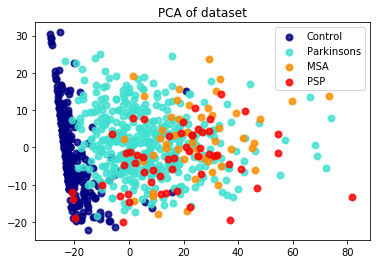

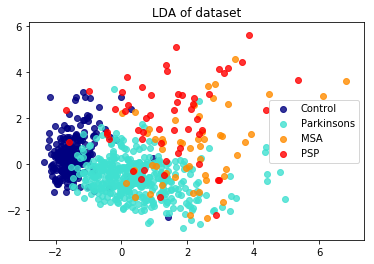

In [77]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()

## With Standardization

In [78]:
#standardize the data
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

X.shape

(746, 10)

[0.609 0.268 0.123]
explained variance ratio (first two components): [0.351 0.146]


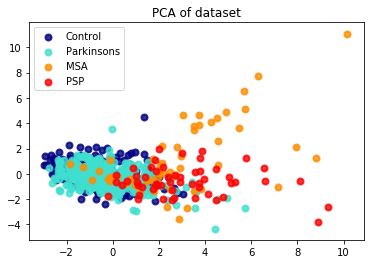

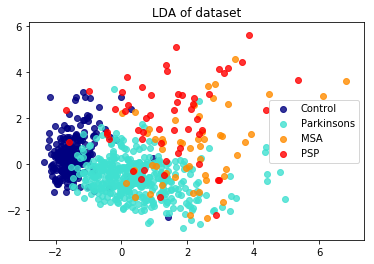

In [79]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=10)
X_r2 = lda.fit(X, y).transform(X)


print(lda.explained_variance_ratio_)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()



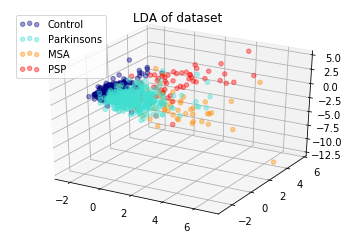

In [80]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    ax.scatter(X_r2[y == i, 0], X_r2[y == i, 1], X_r2[y == i, 2], alpha=.4, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('LDA of dataset')

plt.show()

In [81]:
from sklearn import svm
from sklearn.metrics import classification_report

def svm_grid_search(X_train, X_test, y_train, y_test, cv=5):

    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.0001,0.001,0.01,0.1,1], 'C': [1,10,100,1000]}, {'kernel': ['linear'], 'C': [1,10,100,1000]}]

    print("# Tuning hyper-parameters for f1")
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=cv,
                       scoring='f1_macro',
                       n_jobs = -1 )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
    return clf

In [82]:
from sklearn.utils import resample

def resample_data(df):
    df_control =df[df.GroupID==0]  #246
    df_park = df[df.GroupID==1] #399
    df_msa = df[df.GroupID==2]  #52
    df_psp = df[df.GroupID==3]  #55

    max_length = max([len(df_park), len(df_msa), len(df_psp), len(df_control)])

    if len(df_control) > 0:
        df_control = resample(df_control, replace=True, n_samples=max_length, random_state=3)
    if len(df_msa) > 0:
        df_msa = resample(df_msa, replace=True, n_samples=max_length, random_state=1)
    if len(df_psp) > 0:
        df_psp = resample(df_psp, replace=True, n_samples=max_length, random_state=2)

    return pd.concat([df_control, df_park, df_msa, df_psp])

### Test Train Split


explained variance ratio (LDA): [0.593 0.273 0.134]


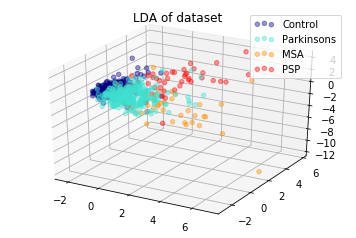

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44)


#standardize the data
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


lda = LinearDiscriminantAnalysis(n_components=3)
X_train_lda = lda.fit(X_train_std, y_train).transform(X_train_std)
X_test_lda = lda.fit(X_train_std, y_train).transform(X_test_std)

print('explained variance ratio (LDA): %s'
      % str(lda.explained_variance_ratio_))


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    ax.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], X_train_lda[y_train == i, 2], alpha=.4, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('LDA of dataset')

plt.show()

In [84]:
clf = svm_grid_search(X_train_lda, X_test_lda, y_train, y_test, cv=5)

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 1000, 'kernel': 'linear'}

Grid scores on development set:

0.176 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.231 (+/-0.056) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.717 (+/-0.095) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.729 (+/-0.155) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.671 (+/-0.093) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.250 (+/-0.072) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.718 (+/-0.098) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.739 (+/-0.114) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.713 (+/-0.128) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.685 (+/-0.064) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.718 (+/-0.098) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.734 (+/-0.109) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.731 (+/-0.136) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.702 (+/-0.077) for {'C': 100, 'ga

In [85]:
model = clf.best_estimator_

validation_data = pd.read_excel('./data/Validation.xlsx')
validation_data = validation_data.drop('GUID', axis=1)
validation_data = validation_data.drop('Subject', axis=1)
validation_data = validation_data[data.columns]

X_valid = validation_data.values[:,:-1]
y_valid = validation_data.values[:,-1]

x_valid_top10 = fit.transform(X_valid)
X_valid_std = std_scale.transform(x_valid_top10)
X_valid_lda = lda.transform(X_valid_std)


model.score(X_valid_lda, y_valid)


0.46

### Plot the validation data on the LDA plot

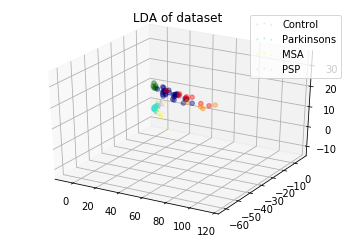

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['lightgreen', 'turquoise', 'yellow', 'pink']
for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    ax.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], X_train_lda[y_train == i, 2], alpha=.4, color=color,
                label=target_name, marker='^', s=1)
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title('LDA of dataset')

# plot Validation data
new_colors = ['darkgreen', 'navy', 'darkorange', 'red']
for color, i, target_name in zip(new_colors, [0, 1, 2, 3], target_names):
    ax.scatter(X_valid_lda[y_valid == i, 0], X_valid_lda[y_valid == i, 1], X_valid_lda[y_valid == i, 2], alpha=.4, color=color,
                label=target_name, marker='o', s=20)



plt.show()